In [1]:
import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5
from platform import python_version
assert int(python_version().split(".")[1]) >= 5, "Please upgrade your Python version following the instructions in \
    the README.txt file found in the same directory as this notebook. Your Python version is " + python_version()
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import nltk
nltk.download('reuters') #to specify download location, optionally add the argument: download_dir='/specify/desired/path/'
from nltk.corpus import reuters

import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/yeabinmoon/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


# Part 1

## Question 1.1

In [6]:
def read_corpus(category="gold"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

In [7]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'western', 'mining', 'to', 'open', 'new', 'gold', 'mine', 'in', 'australia', 'western',
  'mining', 'corp', 'holdings', 'ltd', '&', 'lt', ';', 'wmng', '.', 's', '>', '(', 'wmc', ')',
  'said', 'it', 'will', 'establish', 'a', 'new', 'joint', 'venture', 'gold', 'mine', 'in', 'the',
  'northern', 'territory', 'at', 'a', 'cost', 'of', 'about', '21', 'mln', 'dlrs', '.', 'the',
  'mine', ',', 'to', 'be', 'known', 'as', 'the', 'goodall', 'project', ',', 'will', 'be', 'owned',
  '60', 'pct', 'by', 'wmc', 'and', '40', 'pct', 'by', 'a', 'local', 'w', '.', 'r', '.', 'grace',
  'and', 'co', '&', 'lt', ';', 'gra', '>', 'unit', '.', 'it', 'is', 'located', '30', 'kms', 'east',
  'of', 'the', 'adelaide', 'river', 'at', 'mt', '.', 'bundey', ',', 'wmc', 'said', 'in', 'a',
  'statement', 'it', 'said', 'the', 'open', '-', 'pit', 'mine', ',', 'with', 'a', 'conventional',
  'leach', 'treatment', 'plant', ',', 'is', 'expected', 'to', 'produce', 'about', '50', ',', '000',
  'ounces', 'of', 'gold'

In [8]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            n_corpus_words (integer): number of distinct words across the corpus
    """
    
    
    ### SOLUTION BEGIN
    
    corpus_words = sorted(list(set([y for x in corpus for y in x])))
    n_corpus_words = len(corpus_words)

    ### SOLUTION END

    return corpus_words, n_corpus_words

In [9]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## Question 1.2

In [10]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape 
            (number of unique words in the corpus , number of unique words in the corpus)
            ): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as 
                the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, n_words = distinct_words(corpus)
    
    word2ind = dict(zip(words, range(len(words))))

    M = np.zeros((n_words, n_words), dtype=np.int32)


    
    for doc in corpus:
        for i, center_word in enumerate(doc):
            left = max(0, i - window_size)
            right = min(len(doc), i + window_size + 1)
            context_words = doc[left:i] + doc[i+1:right]
            center_word_idx = word2ind[center_word]
            for context_word in context_words:
                context_word_idx = word2ind[context_word]
                M[center_word_idx, context_word_idx] += 1
                #M[context_word_idx, center_word_idx] += 1
                
    return M, word2ind
    ### SOLUTION BEGIN
    
    
    #M = np.zeros((n_words,n_words))

    ### SOLUTION END

    #return M, word2ind

In [11]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2ind
M_test_ans = np.array( 
    [[0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,],
     [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,]]
)
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
word2ind_ans = dict(zip(ans_test_corpus_words, range(len(ans_test_corpus_words))))

# Test correct word2ind
assert (word2ind_ans == word2ind_test), "Your word2ind is incorrect:\nCorrect: {}\nYours: {}".format(word2ind_ans, word2ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2ind_ans.keys():
    idx1 = word2ind_ans[w1]
    for w2 in word2ind_ans.keys():
        idx2 = word2ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## Question 1.3

In [12]:
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=4)
M_test

array([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2],
       [0, 0, 1, 1, 1, 1, 0, 1, 2, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 2],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 2],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
       [2, 2, 1, 1, 1, 1, 1, 1, 0, 2],
       [2, 1, 0, 2, 2, 0, 0, 0, 2, 2]], dtype=int32)

In [13]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`

    from sklearn.decomposition import TruncatedSVD 
    svd = TruncatedSVD(n_components=k, n_iter= n_iters)  

    M_reduced = svd.fit_transform(M)
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    ### SOLUTION BEGIN
        
    ### SOLUTION END

    print("Done.")
    return M_reduced

In [14]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


## Question 1.4

In [15]:
def plot_embeddings(M_reduced, word2ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """
    
    import matplotlib.pyplot as plt

    ### SOLUTION BEGIN
    
    types = word2ind.keys()
    x_coords = M_reduced[:,0]
    y_coords = M_reduced[:,1]

    # calculate range of x and y values
    x_range = np.max(x_coords) - np.min(x_coords)
    y_range = np.max(y_coords) - np.min(y_coords)

    for i,type in enumerate(types):
        if type in words:
            x = x_coords[i]
            y = y_coords[i]
            plt.scatter(x, y, marker='x', color='red')
            plt.text(x + 0.0001, y + 0.0001, type, fontsize=9)
    plt.show()
    
    
    ### SOLUTION END

--------------------------------------------------------------------------------
Outputted Plot:


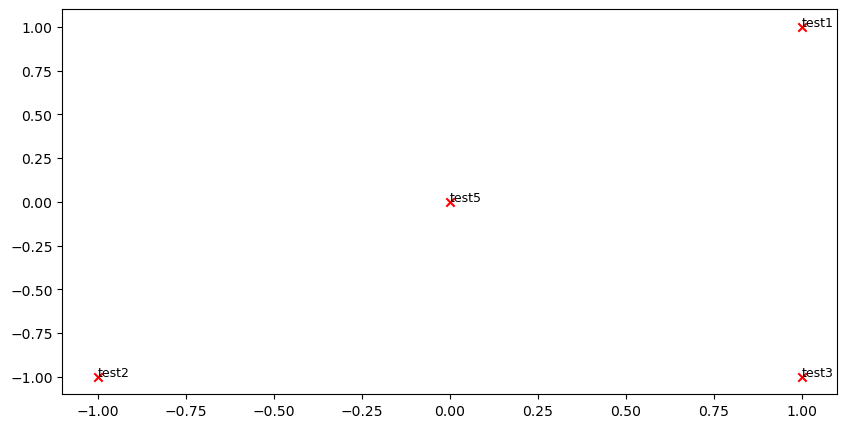

--------------------------------------------------------------------------------


In [16]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test5']
plot_embeddings(M_reduced_plot_test, word2ind_plot_test, words)

print ("-" * 80)

## Question 1.5

Running Truncated SVD over 2830 words...
Done.


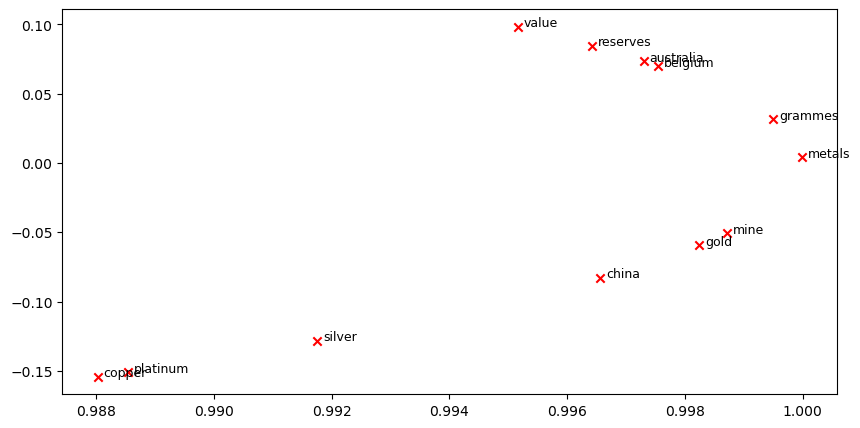

In [17]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
reuters_corpus = read_corpus()
M_co_occurrence, word2ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

words = ['value', 'gold', 'platinum', 'reserves', 'silver', 'metals', 'copper', 'belgium', 'australia', 'china', 'grammes', "mine"]

plot_embeddings(M_normalized, word2ind_co_occurrence, words)

#### a. Find at least two groups of words that cluster together in 2-dimensional embedding space. Give an explanation for each cluster you observe.

- We observe that two clear clusters (belgium, australia) and (copper, platinum)
    - (belgium, australia) cluster seems to put together the countries
    - (copper, platinum) cluster seems to put together metals

#### b. What doesn't cluster together that you might think should have? Describe at least two examples.

- silver should cluster with gold, and metals should be close to (copper, platinum) cluster.
- china should be close to (belgium, australia) cluster.

# Part 2

In [2]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin

In [3]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

Loaded vocab size 400000


In [18]:
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the GloVe vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind

In [19]:
# -----------------------------------------------------------------
# Run Cell to Reduce 200-Dimensional Word Embeddings to k Dimensions
# Note: This should be quick to run
# -----------------------------------------------------------------
M, word2ind = get_matrix_of_vectors(wv_from_bin, words)
M_reduced = reduce_to_k_dim(M, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.
Running Truncated SVD over 10012 words...
Done.


## Question 2.1

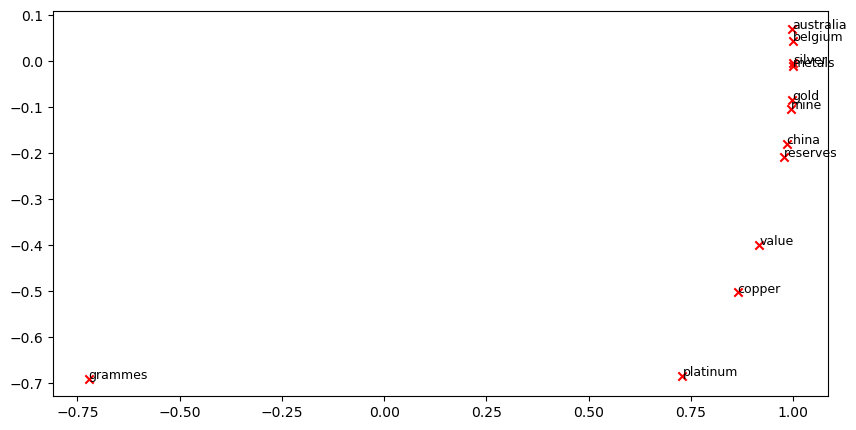

In [20]:
words = ['value', 'gold', 'platinum', 'reserves', 'silver', 'metals', 'copper', 'belgium', 'australia', 'china', 'grammes', "mine"]

plot_embeddings(M_reduced_normalized, word2ind, words)

### a

### b

## Question 2.2

In [26]:
wv_from_bin.most_similar('head')

[('heads', 0.7668997645378113),
 ('headed', 0.6344294548034668),
 ('chief', 0.6314131617546082),
 ('body', 0.6098024249076843),
 ('assistant', 0.6064105033874512),
 ('director', 0.6037707328796387),
 ('deputy', 0.583614706993103),
 ('hand', 0.5738337635993958),
 ('left', 0.5574275255203247),
 ('arm', 0.5565925240516663)]

In [25]:
wv_from_bin.most_similar('star')

[('stars', 0.825630784034729),
 ('superstar', 0.6607545614242554),
 ('actor', 0.5768247842788696),
 ('movie', 0.5601697564125061),
 ('player', 0.5533201098442078),
 ('hollywood', 0.5391762852668762),
 ('veteran', 0.5315371751785278),
 ('starring', 0.5275611877441406),
 ('starred', 0.5274866819381714),
 ('actress', 0.5270617604255676)]

**ChatGPT**: Many polysemous or homonymic words might not work because the two different meanings are not related to each other, or the related words for each meaning do not have a high enough cosine similarity score to be in the top-10 most similar words. For example, the word "watch" has two different meanings, one being a timepiece and the other being to observe, but the top-10 most similar words for "watch" only contain related words for the timepiece meaning such as "clock", "wristwatch", and "timekeeper".

## Question 2.3

In [31]:
### SOLUTION BEGIN

w1 = 'deep'
w2 = 'profound'
w3 =  'shallow'
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

### SOLUTION END

Synonyms deep, profound have cosine distance: 0.43714284896850586
Antonyms deep, shallow have cosine distance: 0.3875182867050171


**ChatGPT**: One possible explanation for this counter-intuitive result is that "deep" and "profound" are very similar in terms of connotation and usage, whereas "deep" and "shallow" are more dissimilar in comparison. This may cause "deep" to have more overlap in its distributional semantics with "shallow" than with "profound", leading to a smaller cosine distance between "deep" and "shallow" than between "deep" and "profound".

## Question 2.4

$\argmax_x \cos((w + (g-m)), x)$

## Question 2.5

### (a)

In [33]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445882797241),
 ('granddaughter', 0.7200807929039001),
 ('daughter', 0.7168301939964294),
 ('mother', 0.7151536345481873),
 ('niece', 0.7005683183670044),
 ('father', 0.6659886837005615),
 ('aunt', 0.6623409390449524),
 ('grandson', 0.6618767380714417),
 ('grandparents', 0.6446609497070312),
 ('wife', 0.644535481929779)]


We cannot say that since the words like "granddaughter", "daughter", or "mother" are similar to "grandmother".

**ChatGPT**:
While these words are related to "woman" in other contexts, they do not complete the given analogy in the same way that "grandmother" does.

It's important to note that when we're solving analogies using word vectors, we're not just looking for words that are similar to one another, but rather we're looking for words that fit a specific semantic relationship. In this case, we're looking for a word that is related to "woman" in the same way that "grandfather" is related to "man", and "grandmother" is the correct answer because it completes the analogy in the most appropriate way based on our understanding of familial relationships.

For the previous example, it's clear that "grandmother" completes the analogy. But give an intuitive explanation as to why the most_similar function gives us words like "granddaughter", "daughter", or "mother?

### (b)

In [45]:
### SOLUTION BEGIN

x, y, a, b = 'paris', 'france', 'madrid', 'spain'
pprint.pprint(wv_from_bin.most_similar(positive=[a, y], negative=[x]))

x, y, a, b = 'jordan', 'basketball', 'woods', 'golf'
pprint.pprint(wv_from_bin.most_similar(positive=[a, y], negative=[x]))
### SOLUTION END

[('spain', 0.815288782119751),
 ('valencia', 0.6382675170898438),
 ('spanish', 0.6097575426101685),
 ('barcelona', 0.6092198491096497),
 ('argentina', 0.6011075973510742),
 ('portugal', 0.5807366371154785),
 ('sevilla', 0.5665968656539917),
 ('zaragoza', 0.5660259127616882),
 ('morocco', 0.5541797876358032),
 ('atletico', 0.5437074899673462)]
[('golf', 0.6202649474143982),
 ('tournament', 0.5485059022903442),
 ('baseball', 0.5295065641403198),
 ('tournaments', 0.5265971422195435),
 ('golfers', 0.5242134928703308),
 ('tennis', 0.5240005850791931),
 ('pga', 0.5128986835479736),
 ('golfer', 0.5099362134933472),
 ('mickelson', 0.499615877866745),
 ('softball', 0.4979386329650879)]


## Quesiton 2.6

### (a)

In [47]:
pprint.pprint(wv_from_bin.most_similar(positive=['foot', 'glove'], negative=['hand']))

[('45,000-square', 0.4922032058238983),
 ('15,000-square', 0.4649604260921478),
 ('10,000-square', 0.4544755816459656),
 ('6,000-square', 0.44975775480270386),
 ('3,500-square', 0.4441334009170532),
 ('700-square', 0.44257497787475586),
 ('50,000-square', 0.4356396794319153),
 ('3,000-square', 0.43486520648002625),
 ('30,000-square', 0.4330596923828125),
 ('footed', 0.43236875534057617)]


**ChatGPT**: It's possible that the unexpected result for the analogy "hand : glove :: foot : sock" is due to the fact that the word vectors were not trained on a large enough dataset that contains enough diverse examples of this specific analogy. The quality of the word vectors depends on the quality and quantity of the data they were trained on, and if the data was insufficient or biased, it can lead to suboptimal results for certain analogies.

Another possible reason could be that the word vectors may not have captured the specific semantic relationship between the words in this analogy. For example, the word "sock" may be more strongly associated with "shoe" rather than "foot" in the word vectors, which could explain why it didn't rank highly in the results for the given analogy.

### (b)

In [48]:
### SOLUTION BEGIN

x, y, a, b = 'obama', 'usa', 'jinping', 'china'
pprint.pprint(wv_from_bin.most_similar(positive=[a, y], negative=[x]))

### SOLUTION END

[('oly-2004-basket', 0.447391539812088),
 ('x8', 0.4282565712928772),
 ('u.s.a.', 0.41589221358299255),
 ('childhelp', 0.40578693151474),
 ('xi', 0.401632159948349),
 ('x7', 0.39071786403656006),
 ('x6', 0.38885846734046936),
 ('x2', 0.38303112983703613),
 ('progpower', 0.3809340298175812),
 ('fasa', 0.37717172503471375)]


## Question 2.7

In [49]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.

pprint.pprint(wv_from_bin.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'profession'], negative=['man']))

[('reputation', 0.5250177383422852),
 ('professions', 0.5178037881851196),
 ('skill', 0.4904696047306061),
 ('skills', 0.49005505442619324),
 ('ethic', 0.4897659420967102),
 ('business', 0.4875850975513458),
 ('respected', 0.485920250415802),
 ('practice', 0.482104629278183),
 ('regarded', 0.47785720229148865),
 ('life', 0.4760662913322449)]

[('professions', 0.5957458019256592),
 ('practitioner', 0.4988412857055664),
 ('teaching', 0.48292145133018494),
 ('nursing', 0.48211807012557983),
 ('vocation', 0.4788966476917267),
 ('teacher', 0.47160351276397705),
 ('practicing', 0.46937811374664307),
 ('educator', 0.46524322032928467),
 ('physicians', 0.4628995358943939),
 ('professionals', 0.46013936400413513)]


**ChatGPT related**
The list of female-associated words includes mostly traditional professions associated with women, such as "teacher" and "nurse". In contrast, the list of male-associated words includes mostly skilled professions or business oriented.

This reflects gender bias because it perpetuates the stereotype that women are more suited for nurturing professions, while men are more suited for high-status and intellectual professions. This stereotype has been challenged by recent social and economic changes, and there is evidence that women can excel in any profession that they choose to pursue.

## Question 2.8

In [52]:
### SOLUTION BEGIN

A = 'white'
B = 'black'
word = 'sport'
pprint.pprint(wv_from_bin.most_similar(positive=[A, word], negative=[B]))
print()
pprint.pprint(wv_from_bin.most_similar(positive=[B, word], negative=[A]))

### SOLUTION END

[('sports', 0.6619971394538879),
 ('racing', 0.5191970467567444),
 ('cycling', 0.49602678418159485),
 ('sporting', 0.49585825204849243),
 ('baseball', 0.4808858036994934),
 ('olympics', 0.4529946446418762),
 ('competitive', 0.4522234797477722),
 ('soccer', 0.4442768096923828),
 ('football', 0.44152799248695374),
 ('swimming', 0.43901708722114563)]

[('sports', 0.6435781717300415),
 ('sporting', 0.5298329591751099),
 ('soccer', 0.48968619108200073),
 ('compete', 0.47752615809440613),
 ('clubs', 0.4721497893333435),
 ('competitions', 0.4656528830528259),
 ('professional', 0.46252578496932983),
 ('football', 0.46217307448387146),
 ('popular', 0.46138277649879456),
 ('basketball', 0.458052396774292)]


The results of the first and second queries show interesting differences. In the first query, the most similar word to the combination of "white" and "sport" includes "baseball", while in the second query, the most similar word to the combination of "black" and "sport" includes "basketball". These results suggest that certain sports may be associated with different racial groups, which could potentially reflect a bias in the data or in society. However, it's important to note that these associations are not necessarily true for all individuals or communities and should not be used to make generalizations or stereotypes.

## Question 2.9

## (a)

Bias can get into word vectors when the data used to train them reflects the societal biases and prejudices that exist in the world. For example, if a dataset used to train word vectors contains more examples of men in high-status jobs than women, the resulting word vectors may be biased towards associating certain professions with men rather than women.
A real-world example of this source of bias is the "Google Images" search engine. In 2015, a group of researchers found that when searching for certain professions, such as "CEO" or "doctor", the images that appeared were predominantly of men. This could potentially reinforce the stereotype that these professions are only for men and discourage women from pursuing them. This bias could then be reflected in the word vectors trained on the data, leading to biased associations between professions and genders.

## (b) Delete